In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
file_path = '/content/drive/My Drive/Thyroid_Cancer.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
# Basic data overview
print("\nDataset Shape:", df.shape)
print("\nData Summary:")
print(df.describe(include='all'))


Dataset Shape: (383, 17)

Data Summary:
               Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
count   383.000000    383     383        383             383              383   
unique         NaN      2       2          2               2                5   
top            NaN      F      No         No              No        Euthyroid   
freq           NaN    312     334        355             376              332   
mean     40.866841    NaN     NaN        NaN             NaN              NaN   
std      15.134494    NaN     NaN        NaN             NaN              NaN   
min      15.000000    NaN     NaN        NaN             NaN              NaN   
25%      29.000000    NaN     NaN        NaN             NaN              NaN   
50%      37.000000    NaN     NaN        NaN             NaN              NaN   
75%      51.000000    NaN     NaN        NaN             NaN              NaN   
max      82.000000    NaN     NaN        NaN             NaN        

<ipython-input-6-5104a72764a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recurred', data=df, palette='Set2')


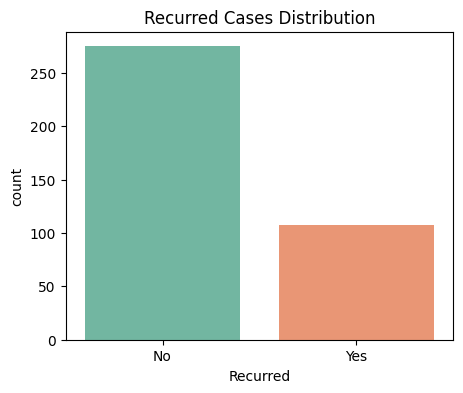

In [ ]:
# Check for class imbalance in target variable
plt.figure(figsize=(5, 4))
sns.countplot(x='Recurred', data=df, palette='Set2')
plt.title('Recurred Cases Distribution')
plt.show()

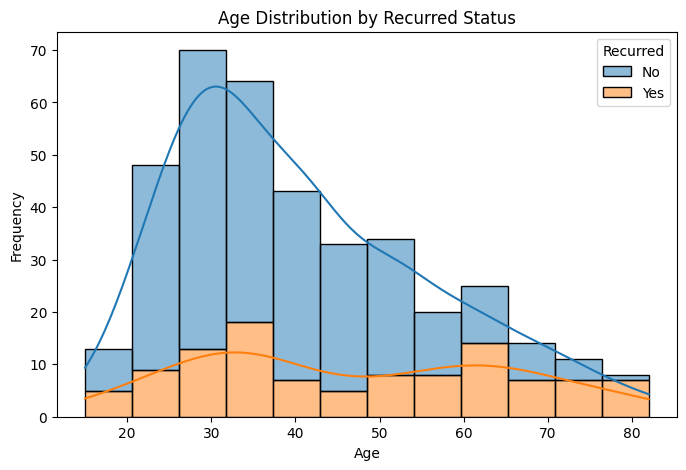

In [ ]:
# Plot age distribution across recurrence cases
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Recurred', multiple='stack', kde=True)
plt.title('Age Distribution by Recurred Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Data Preprocessing: Encoding categorical variables
categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
                       'Thyroid Function', 'Physical Examination', 'Adenopathy',
                       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store each encoder for reference

In [ ]:
# Scaling numerical features
numerical_columns = ['Age']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
# Display preprocessed data sample
print("\nSample of Preprocessed Data:")
print(df.head(10))


Sample of Preprocessed Data:
        Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0 -0.917439       0        0           0                0                 2   
1 -0.454315       0        0           1                0                 2   
2 -0.718957       0        0           0                0                 2   
3  1.398184       0        0           0                0                 2   
4  1.398184       0        0           0                0                 2   
5  0.736577       1        1           0                0                 2   
6  0.008810       0        0           1                0                 0   
7  0.339613       0        0           0                0                 2   
8  0.670416       0        0           0                0                 2   
9 -0.057351       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3  

In [ ]:
# Split data into features and target
X = df.drop('Recurred', axis=1)
y = df['Recurred']

In [ ]:
X

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,-0.917439,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2
1,-0.454315,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1
2,-0.718957,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
3,1.398184,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
4,1.398184,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2.059790,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0
379,2.655236,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3
380,2.059790,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3
381,1.332023,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3


<ipython-input-15-a4f1fabfc41b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


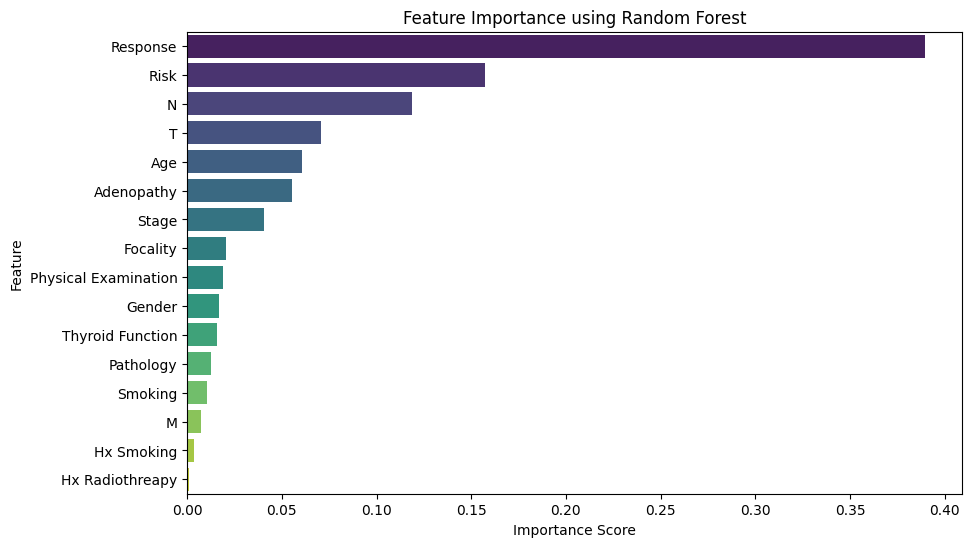

In [ ]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y = label_encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Initialize the SVM model
svm_model = SVC(probability=True, random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions using the SVM model
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability for AUC-ROC

# Evaluate the SVM model
print("Support Vector Machine (SVM) Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM) Evaluation
Accuracy: 0.935064935064935
Precision: 0.9375
Recall: 0.7894736842105263
F1 Score: 0.8571428571428571
AUC-ROC: 0.942831215970962

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77



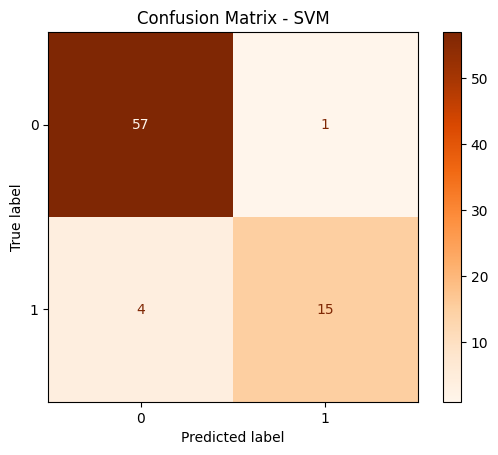

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability for AUC-ROC

# Evaluate the Random Forest model
print("Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Evaluation
Accuracy: 0.987012987012987
Precision: 1.0
Recall: 0.9473684210526315
F1 Score: 0.972972972972973
AUC-ROC: 0.9972776769509982

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



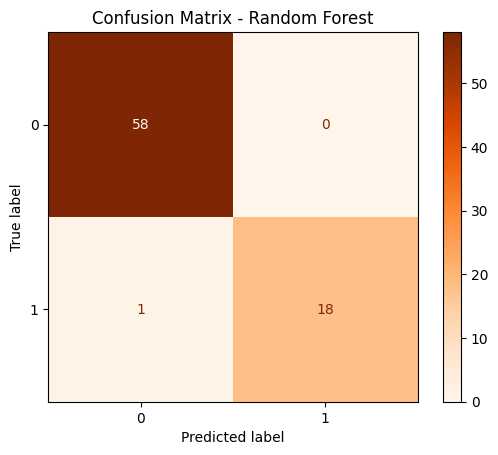

In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Probability for AUC-ROC

# Evaluate the Decision Tree model
print("Decision Tree Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Evaluation
Accuracy: 0.922077922077922
Precision: 0.8095238095238095
Recall: 0.8947368421052632
F1 Score: 0.85
AUC-ROC: 0.912885662431942

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.81      0.89      0.85        19

    accuracy                           0.92        77
   macro avg       0.89      0.91      0.90        77
weighted avg       0.93      0.92      0.92        77



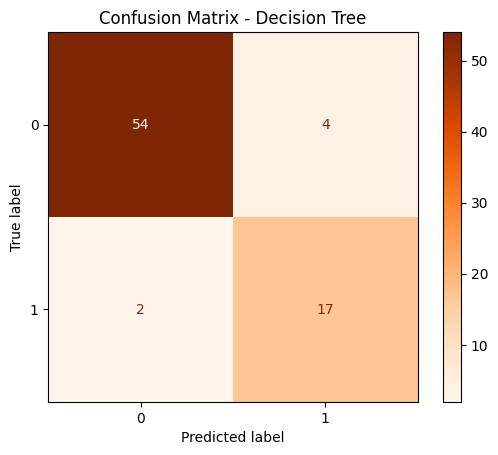

In [ ]:
# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot(cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree")
plt.show()